In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib inline


crimes = pd.read_csv("MontgomeryCountyCrime2013.csv")


In [2]:
d_time = pd.to_datetime(crimes["Dispatch Date / Time"])

In [3]:
d_time.dt.weekday_name.value_counts(normalize=True, ascending=False, sort=False).plot(kind='bar')

In [4]:
d_time.dt.hour.value_counts(normalize=True, ascending=True).sort_index().plot(kind='bar', 
                                                                              figsize = [32, 8], 
                                                                              fontsize=22)

plt.title("Crimes por hora", fontsize=30)


In [5]:
crimes['City'].value_counts(normalize=True, ascending=True).sort_index().plot(kind='bar', 
                                                                              figsize = [32, 8],
                                                                              fontsize=22)
plt.title("Crimes por cidade", fontsize=30)


In [6]:
silverSpring_crimes_month =  pd.to_datetime(
    crimes[crimes['City'] == 'SILVER SPRING'].loc[:,"Dispatch Date / Time"])

silverSpring_crimes_month.dt.month.value_counts(normalize='True').sort_index().plot(kind='bar',
                                                                                    figsize = [32, 8],
                                                                                    fontsize=22)


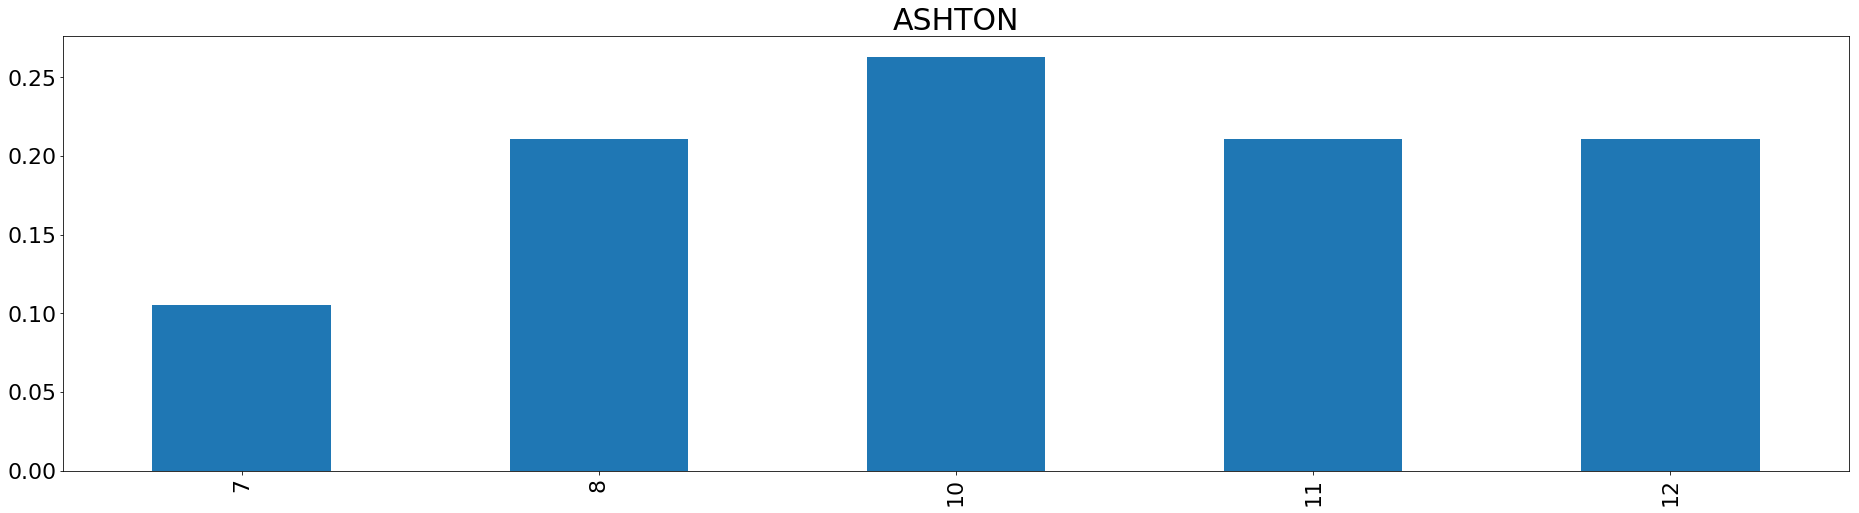

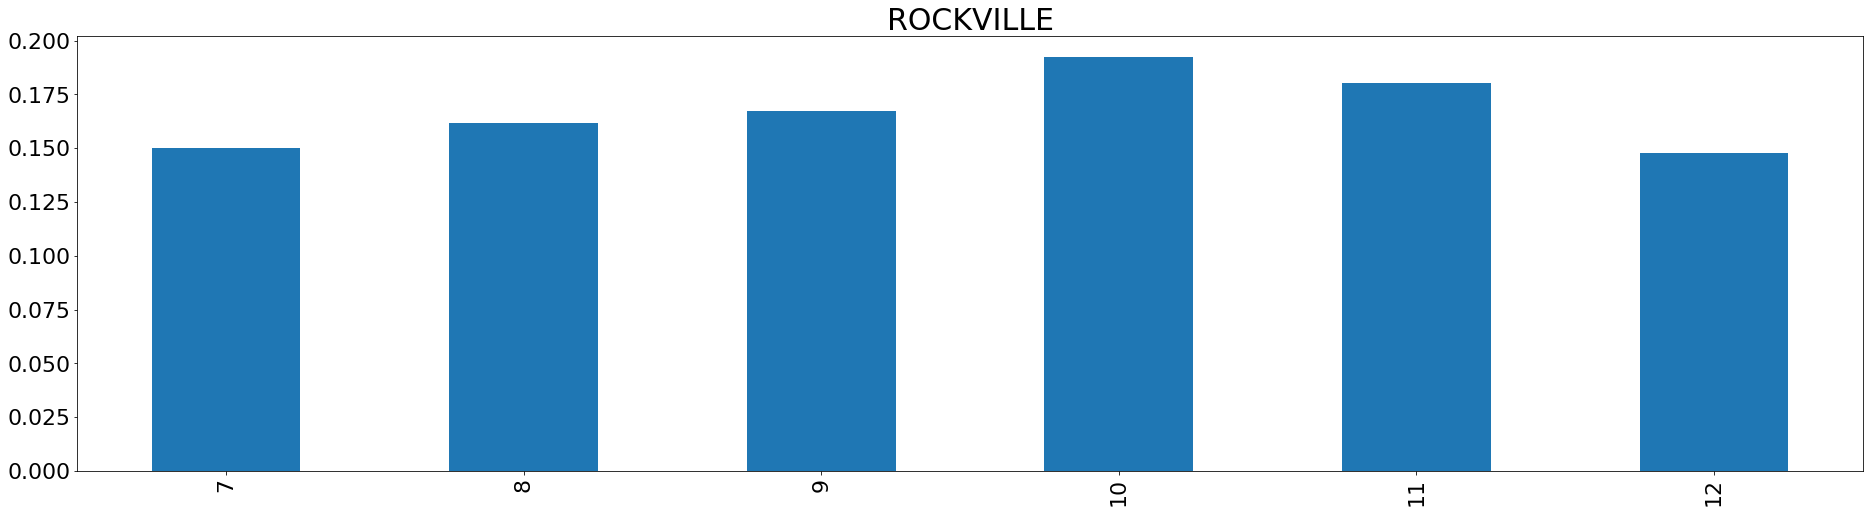

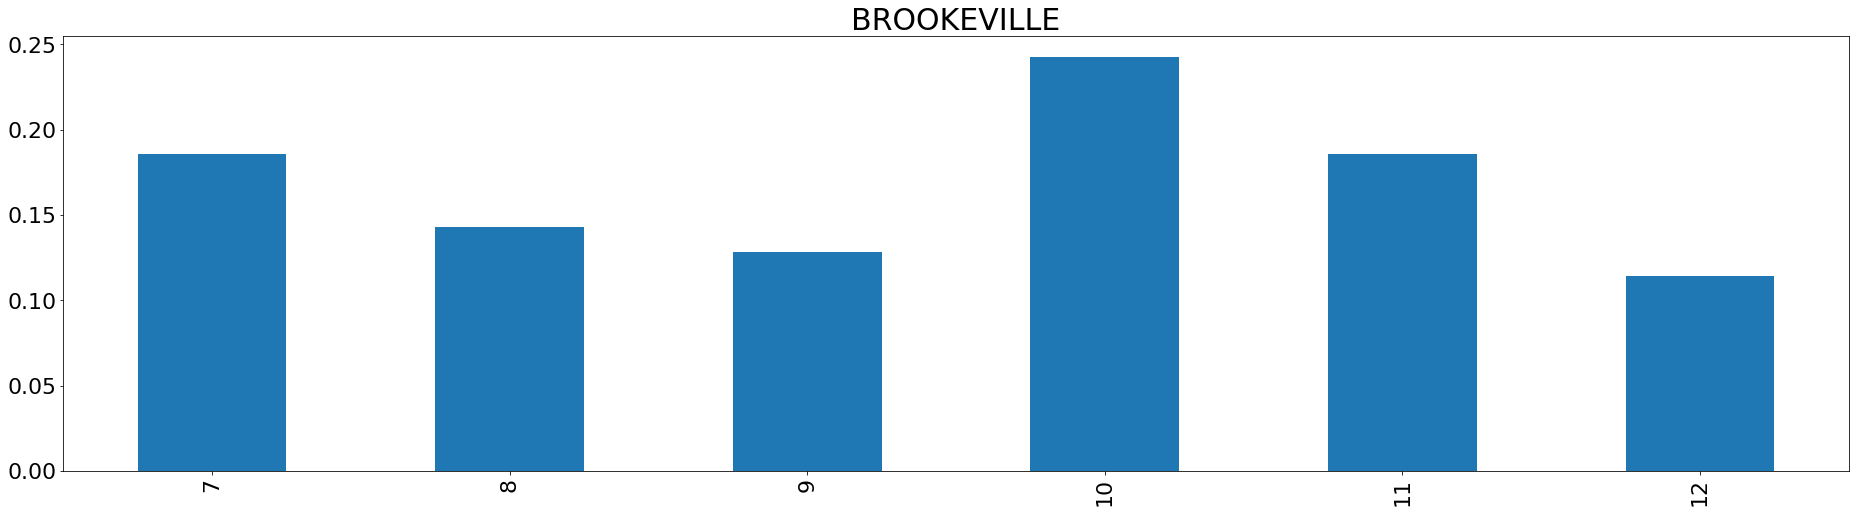

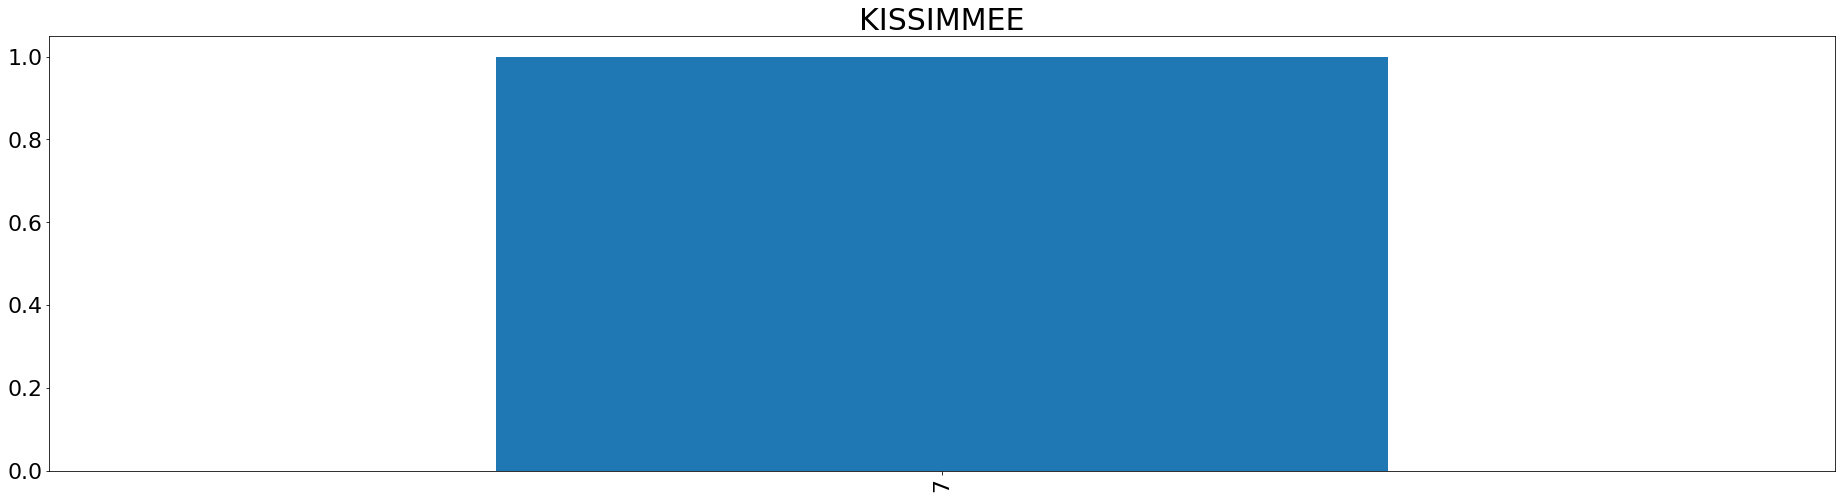

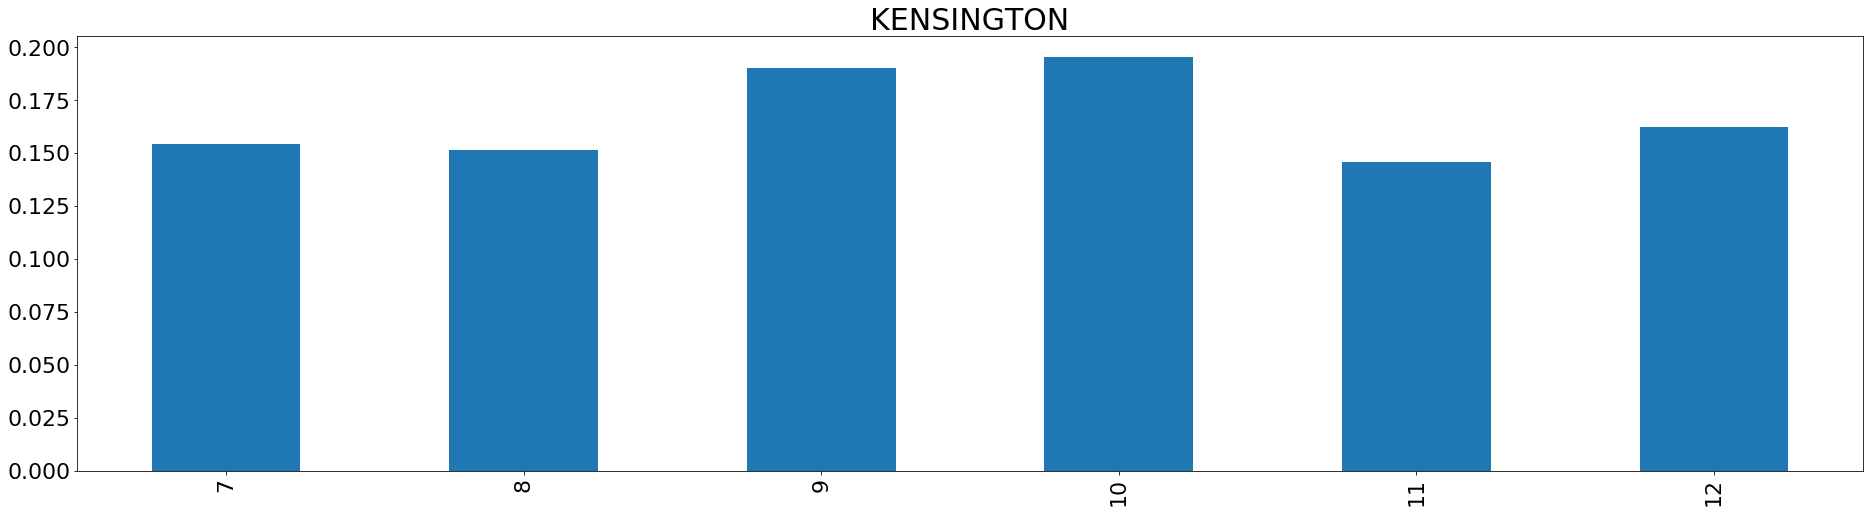

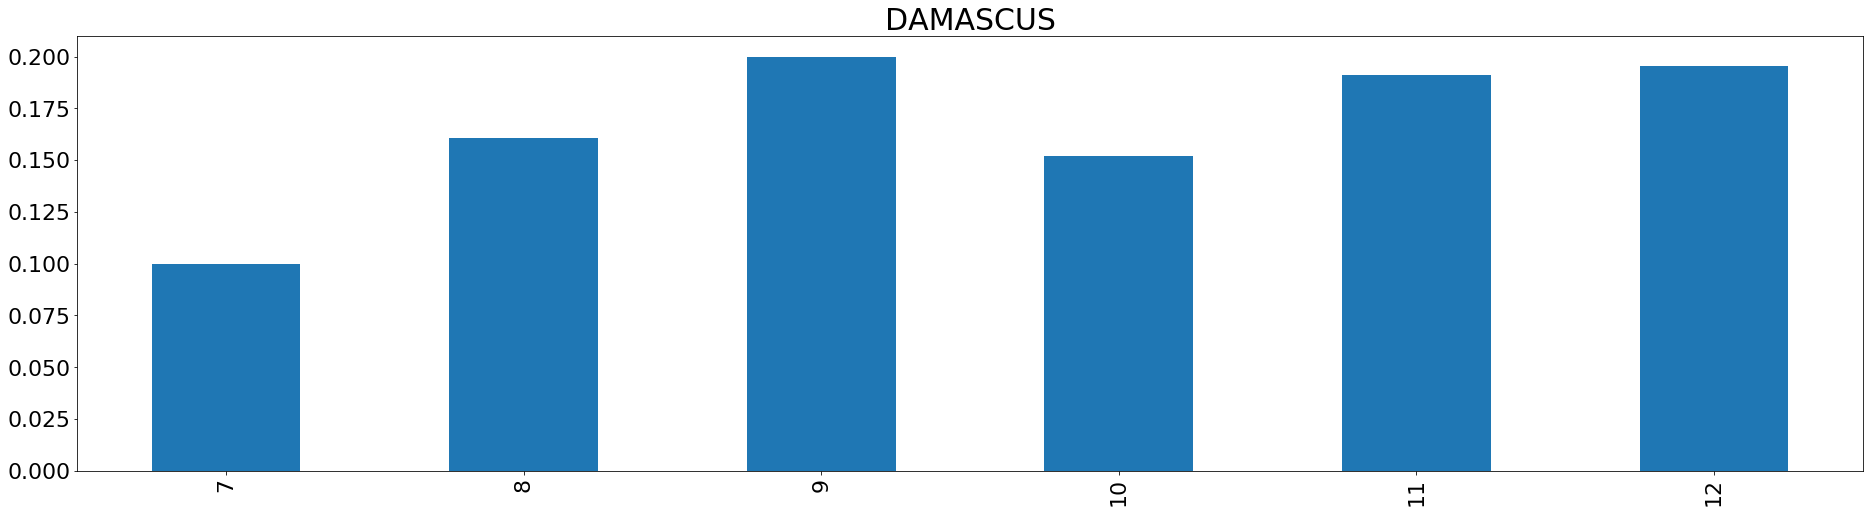

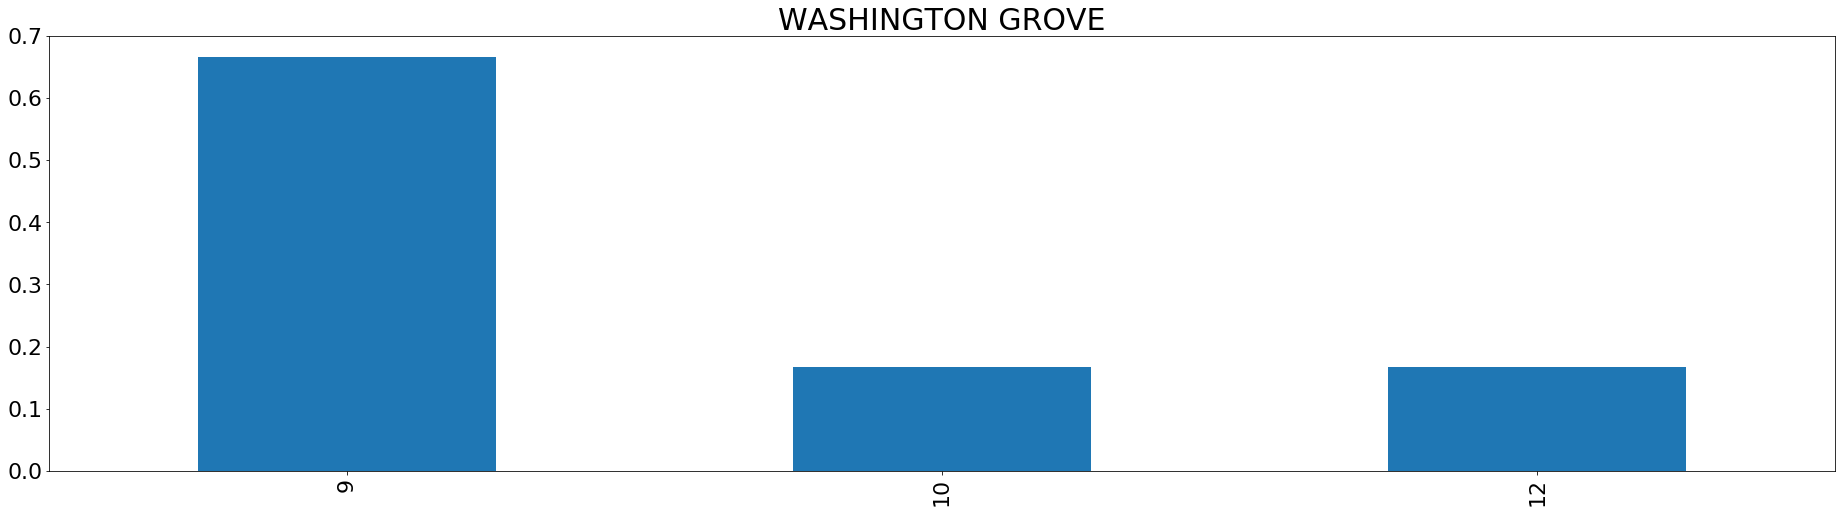

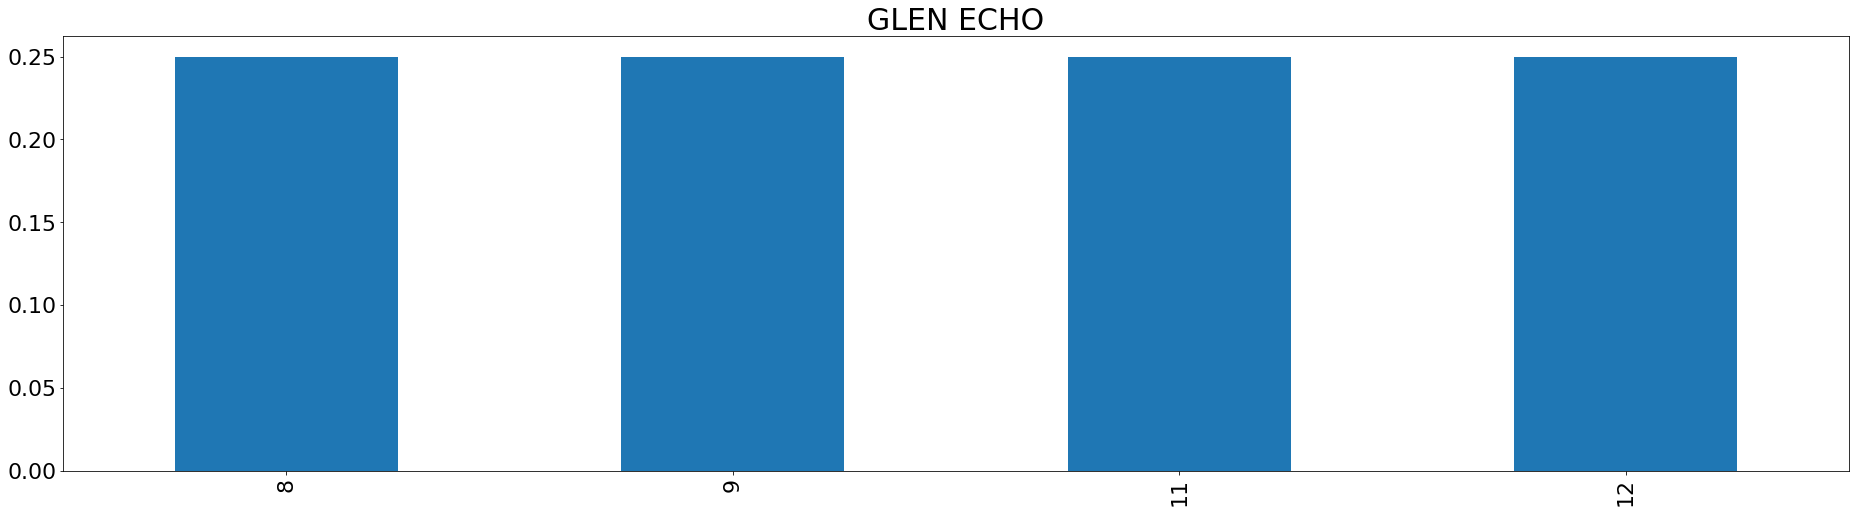

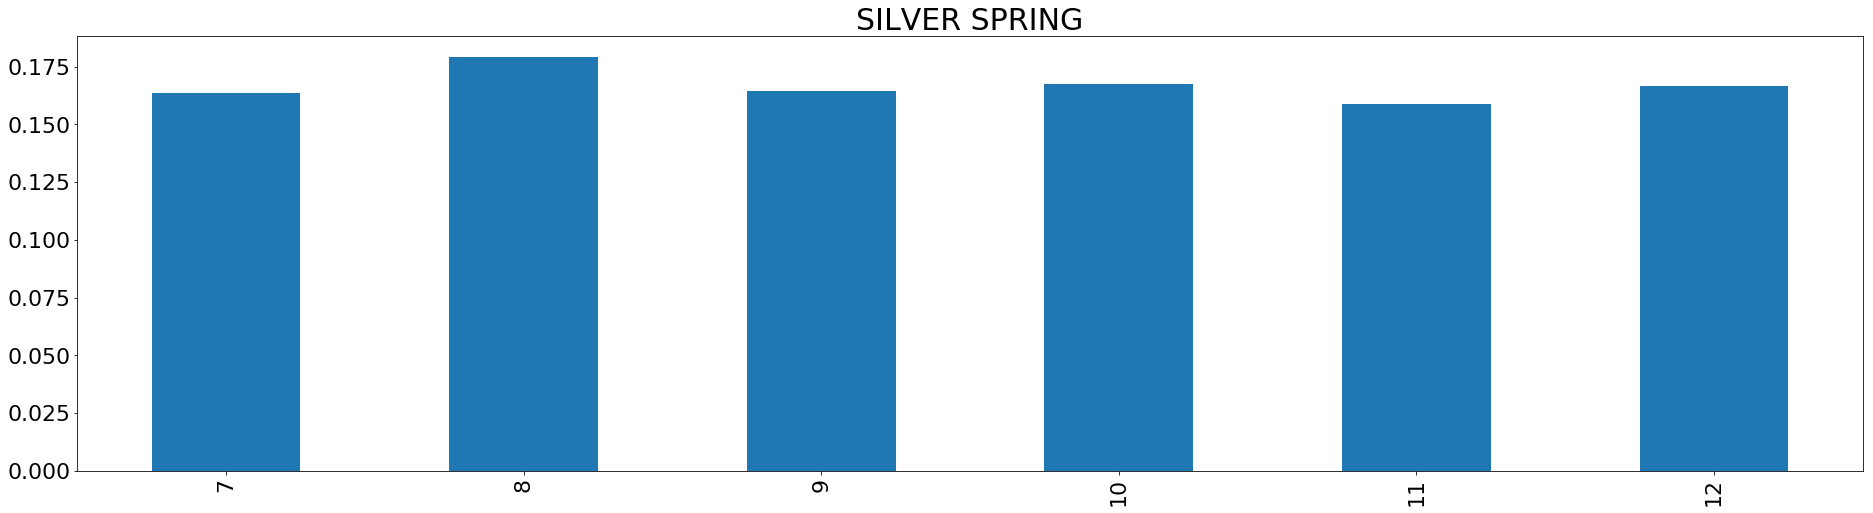

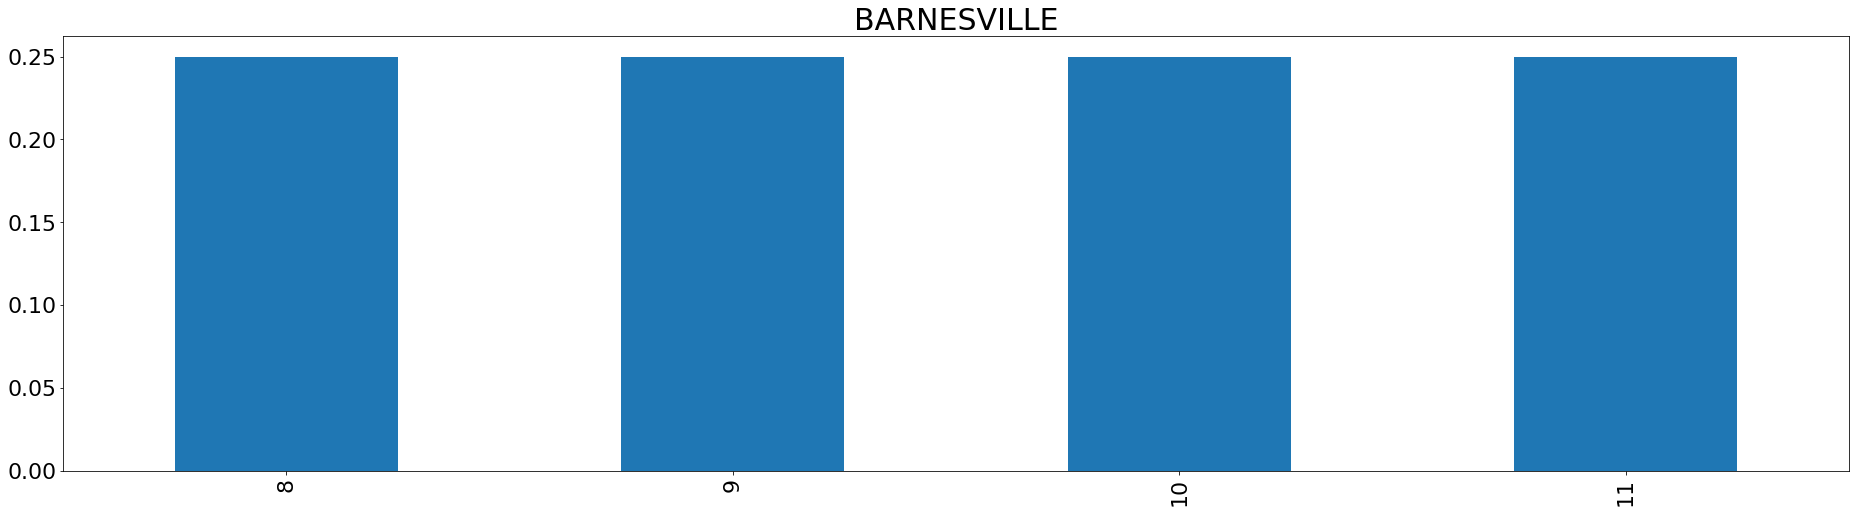

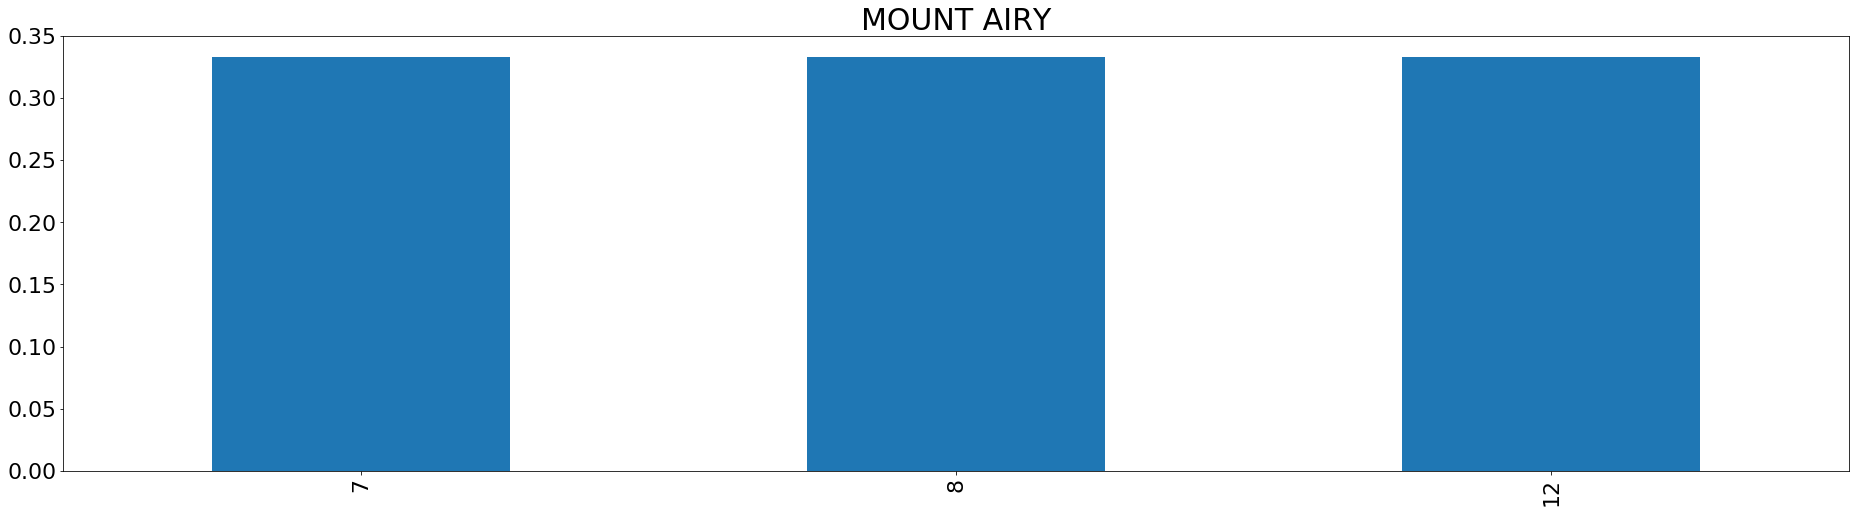

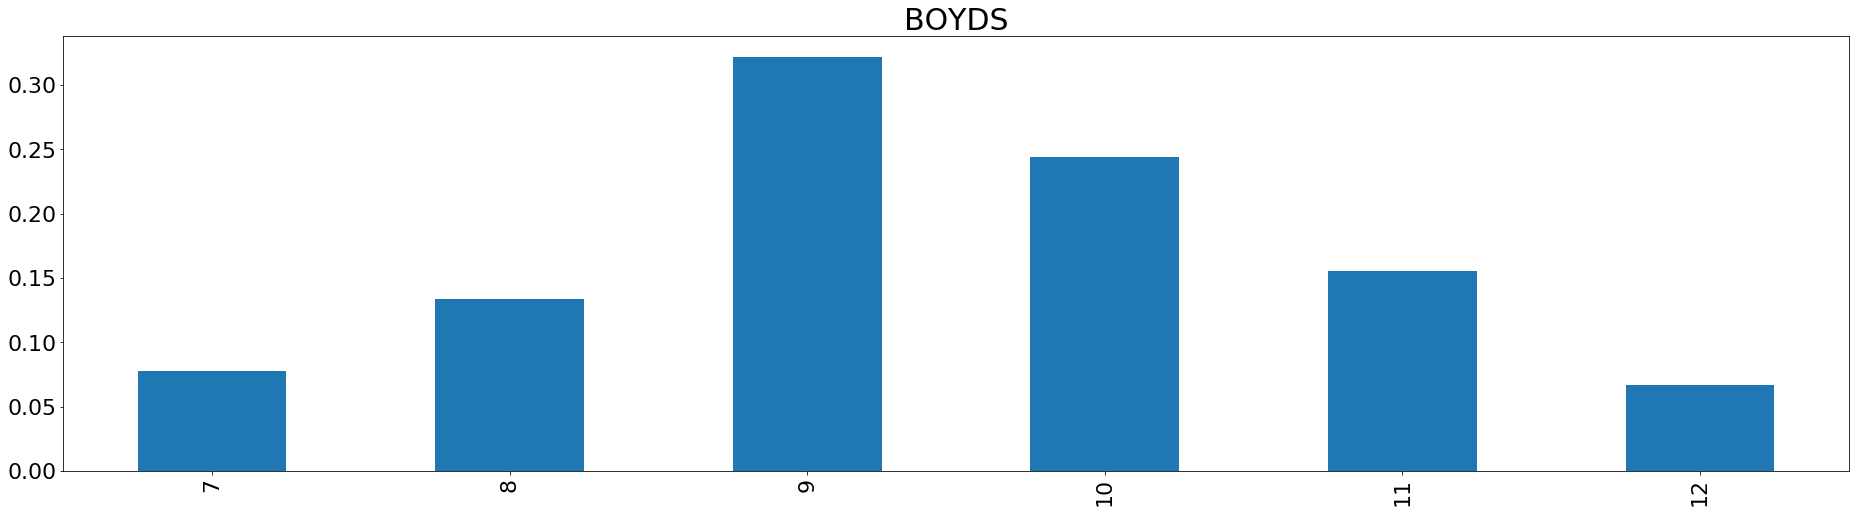

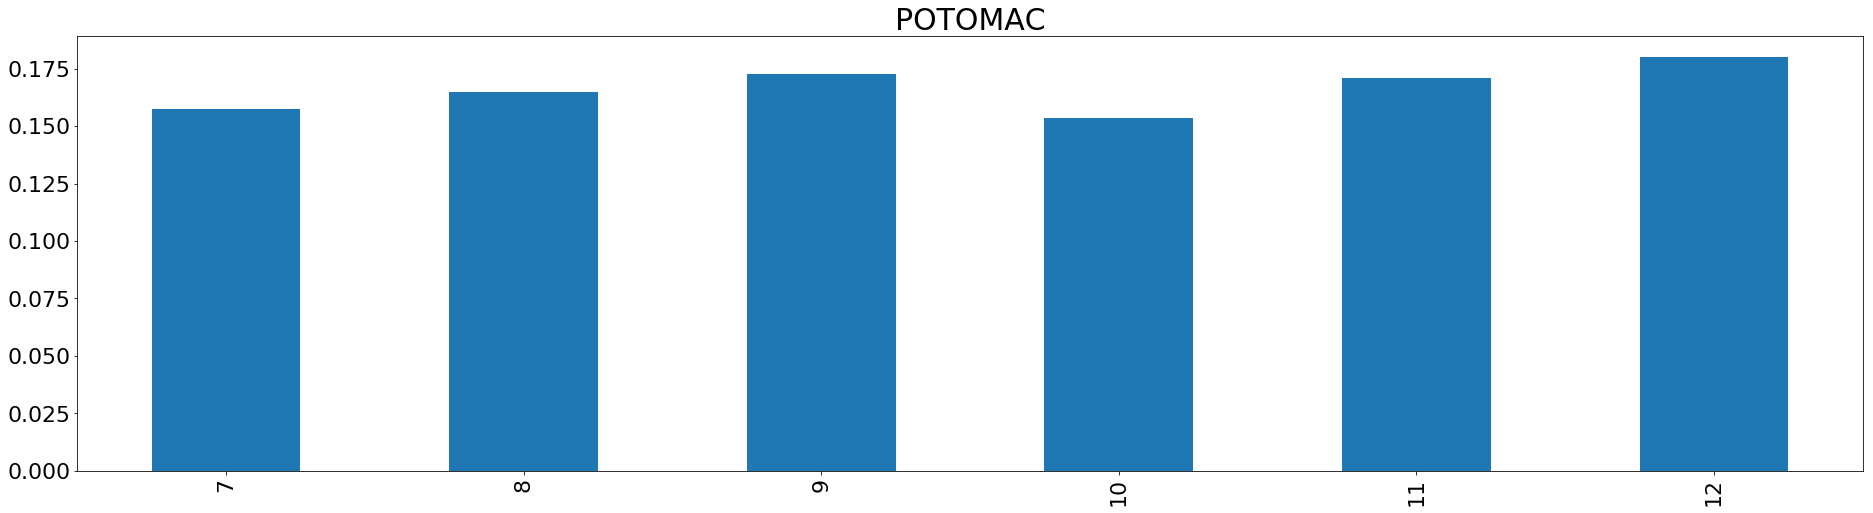

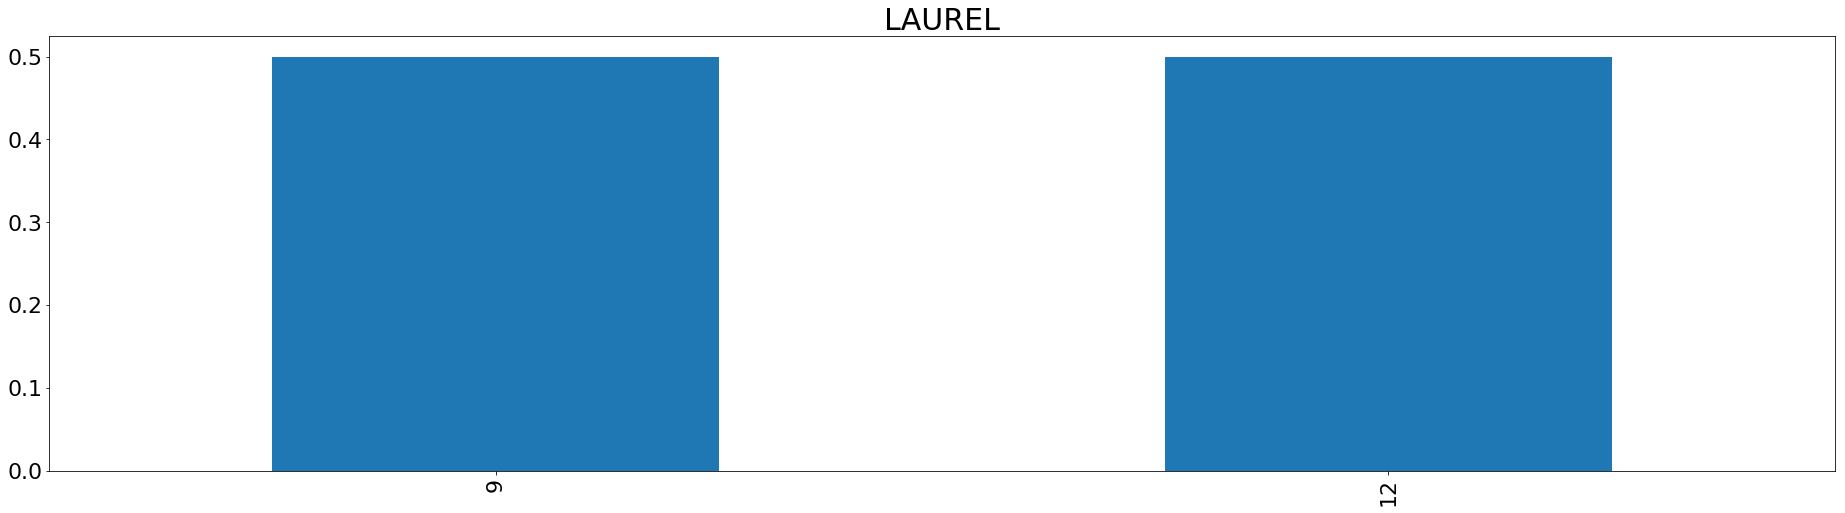

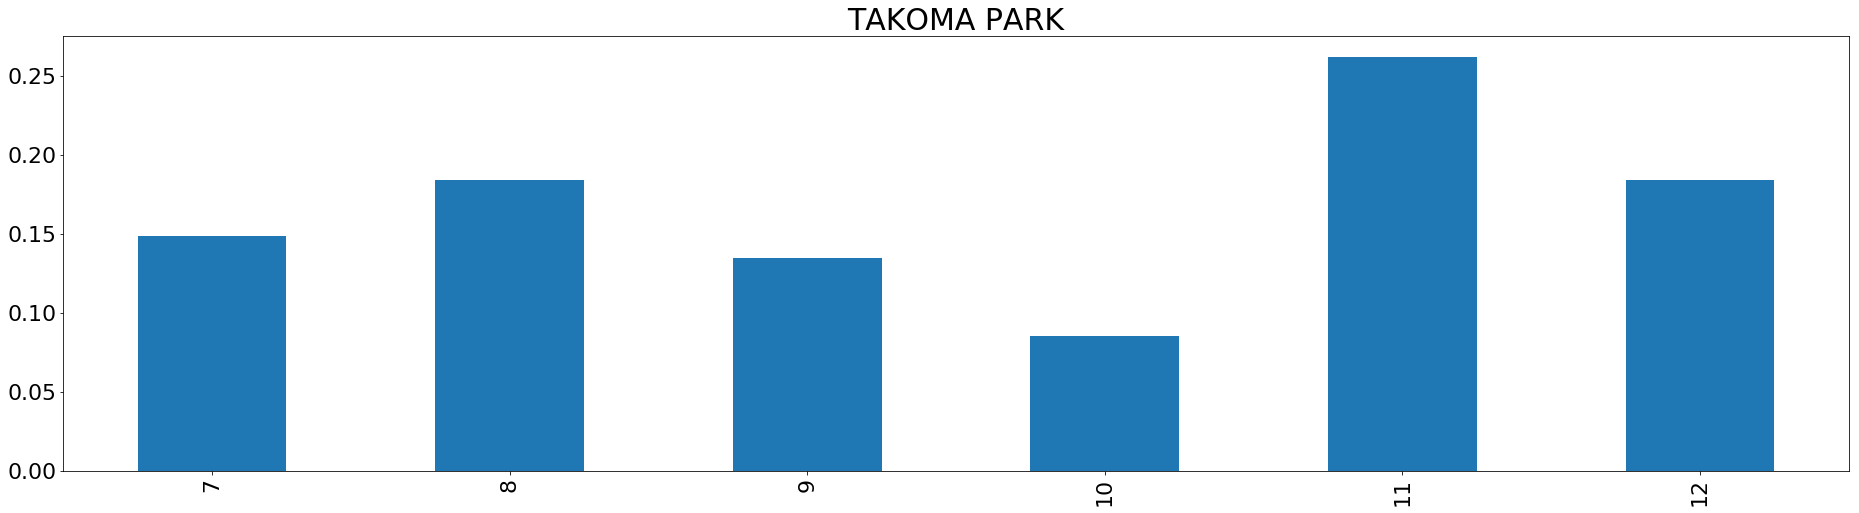

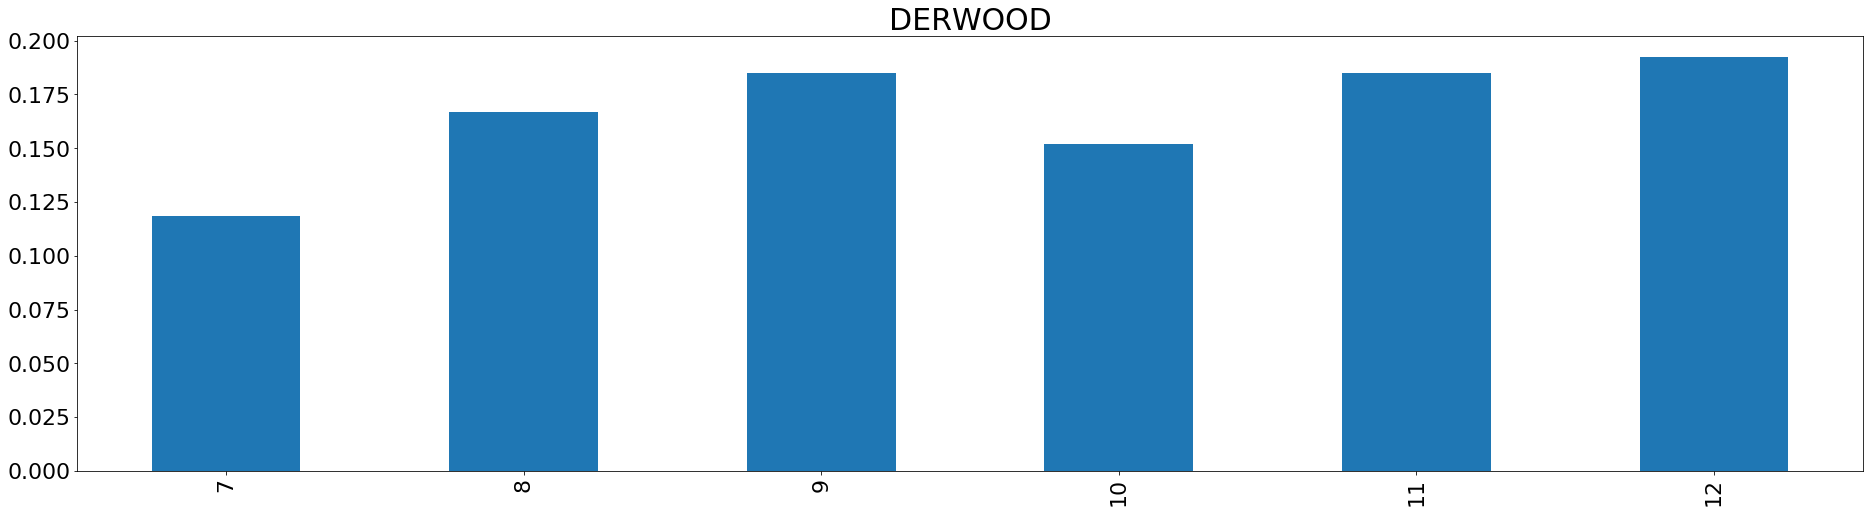

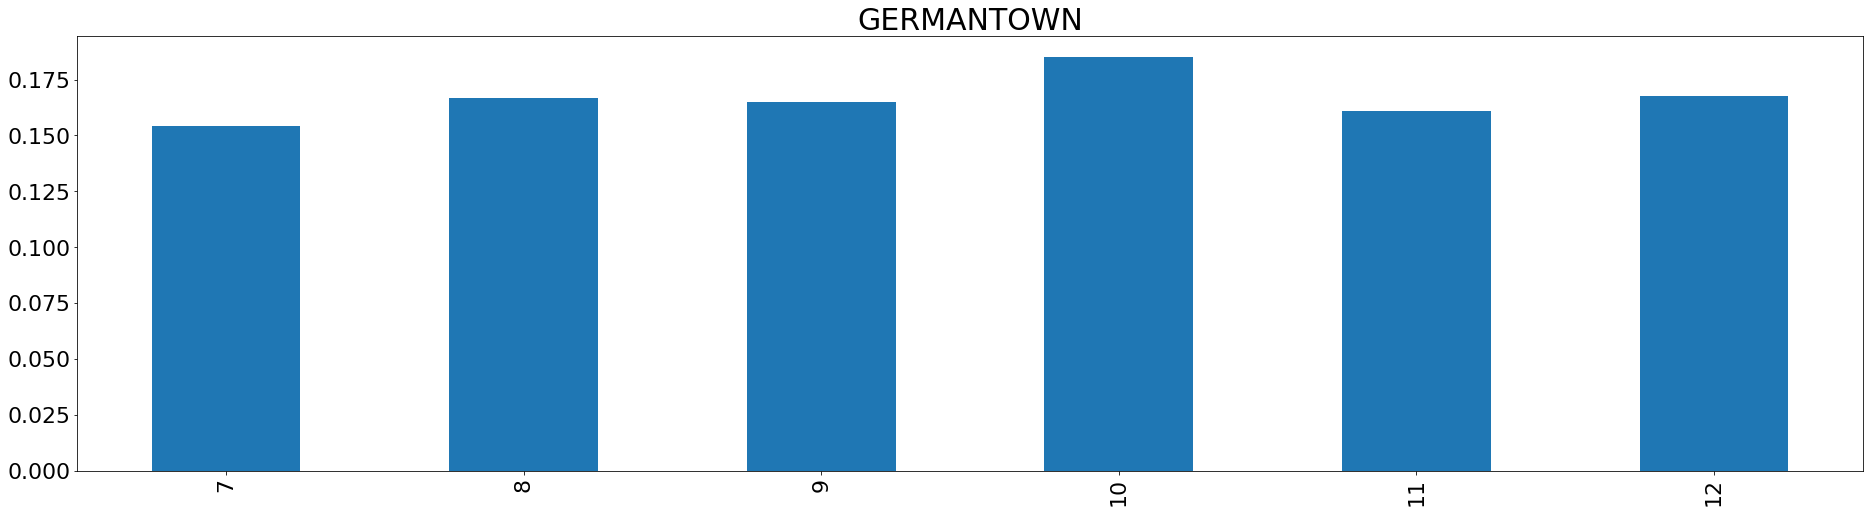

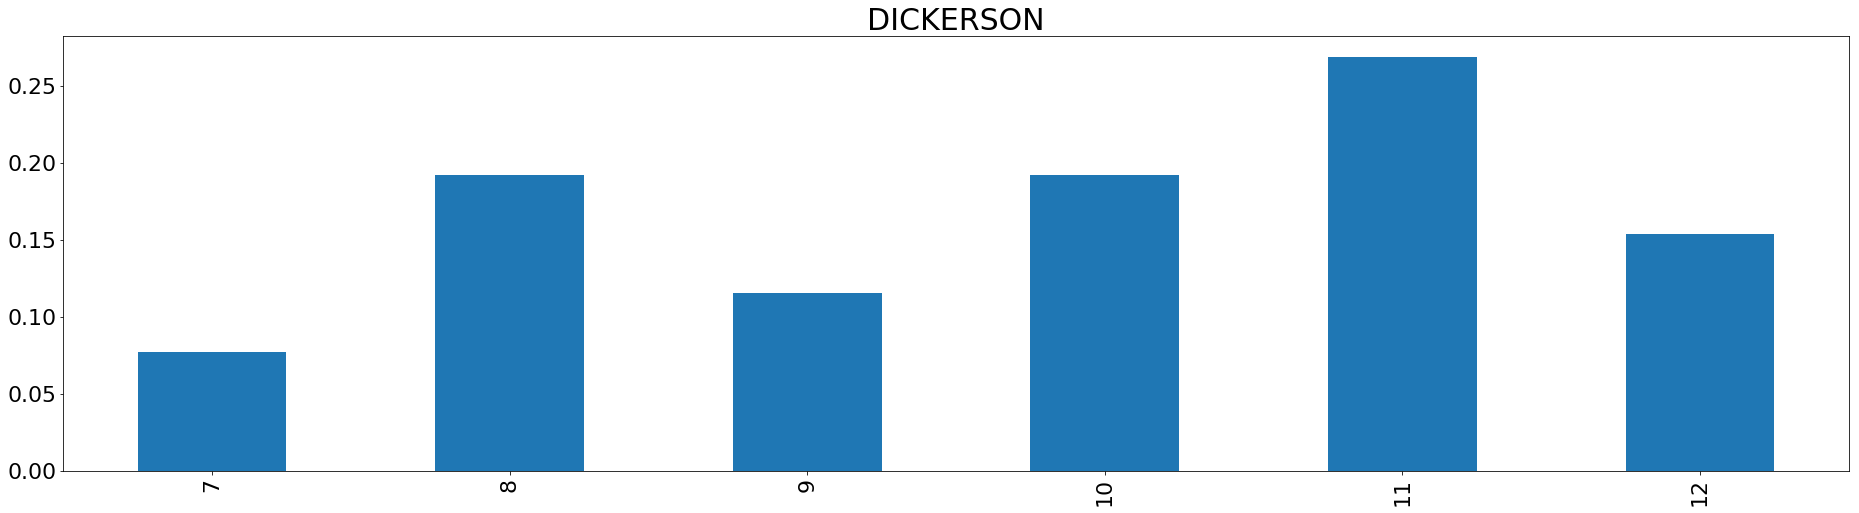

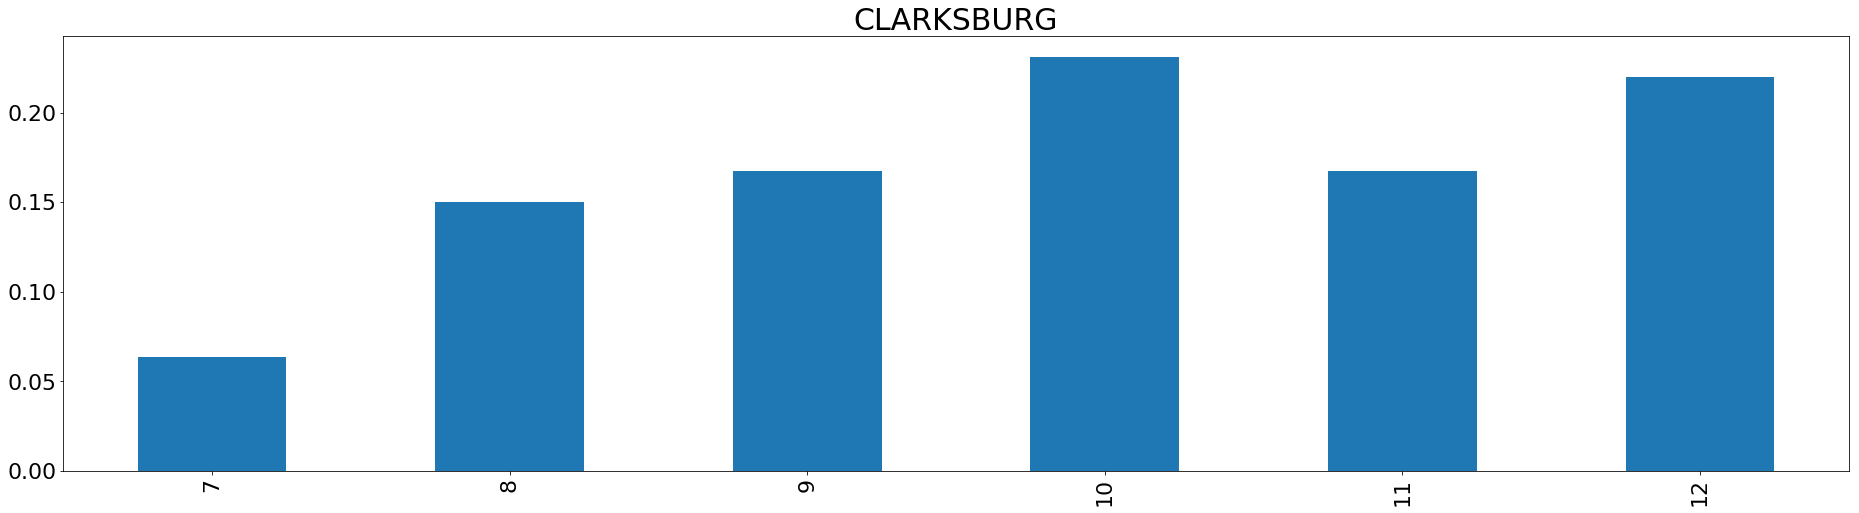

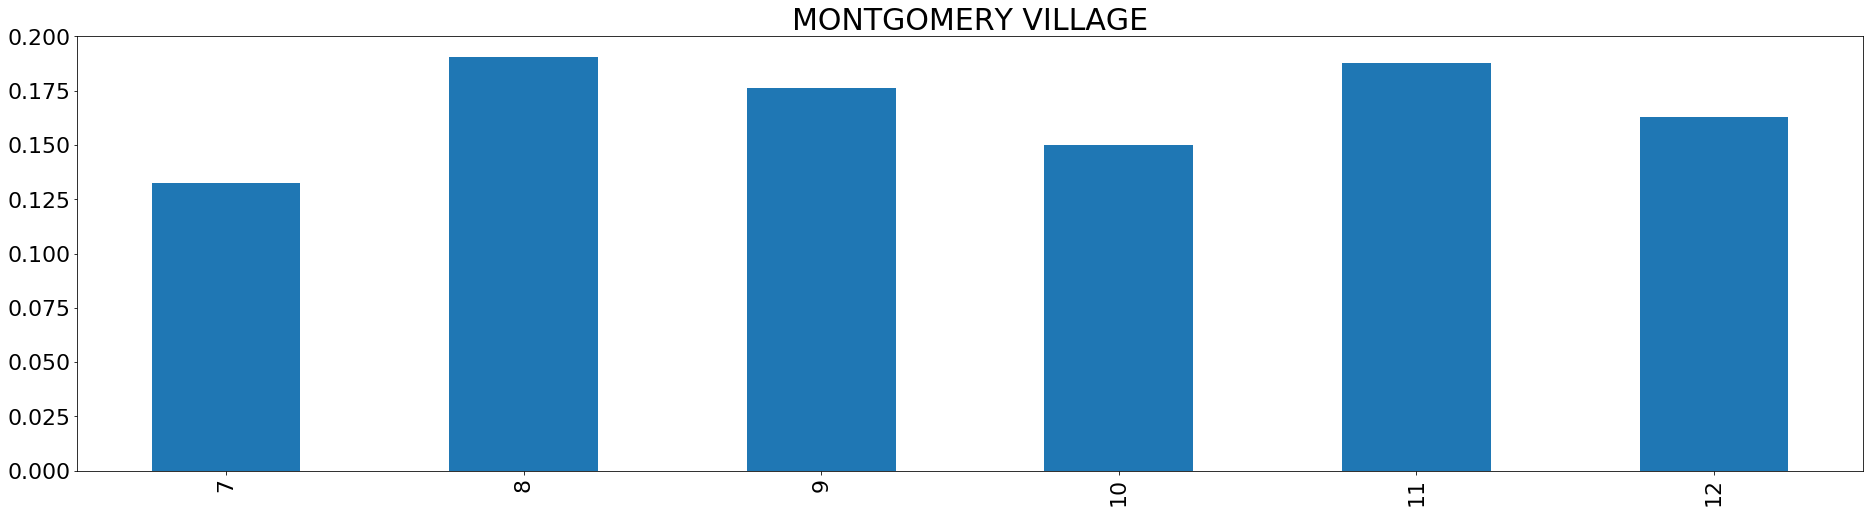

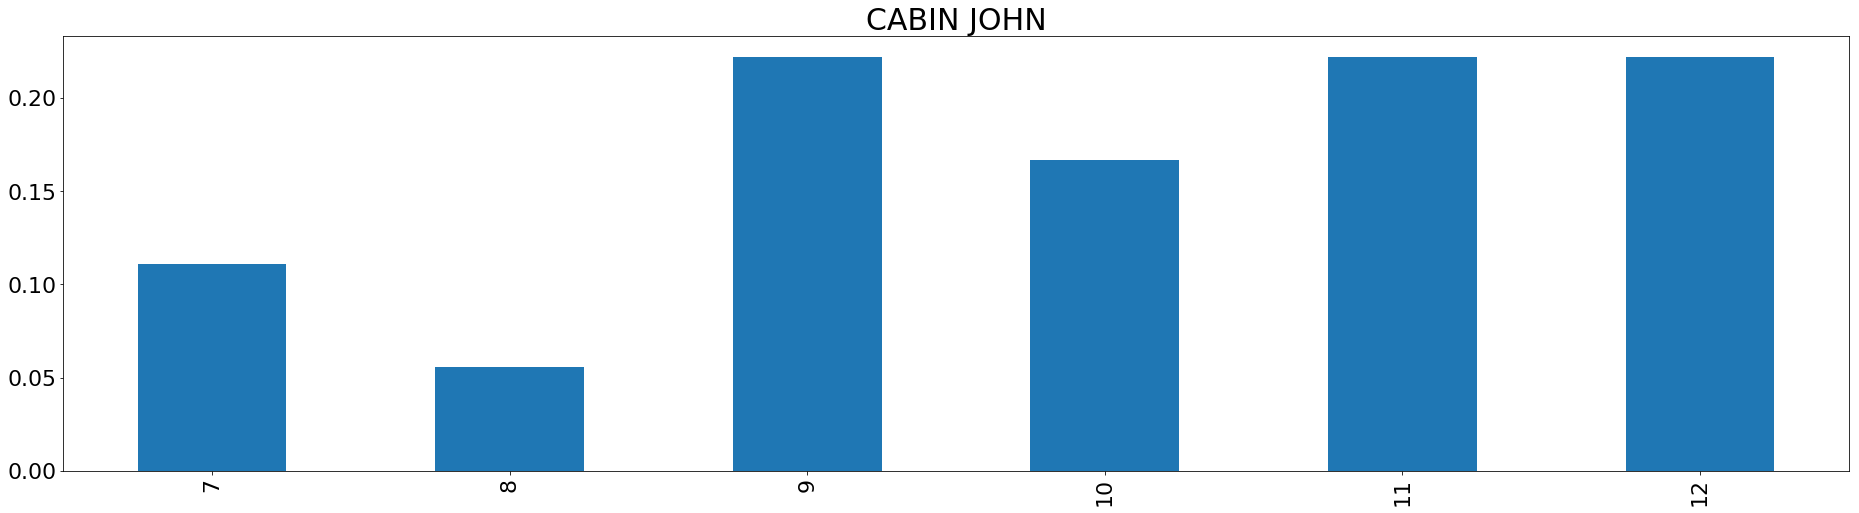

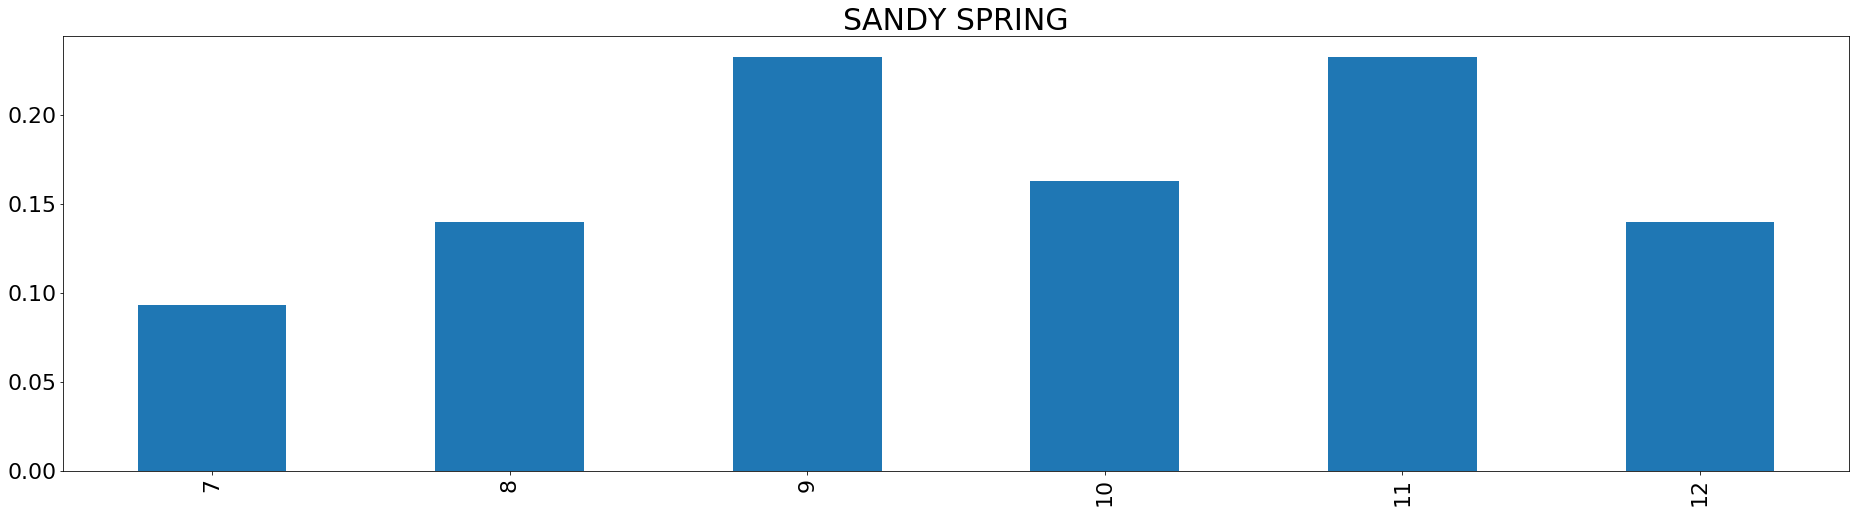

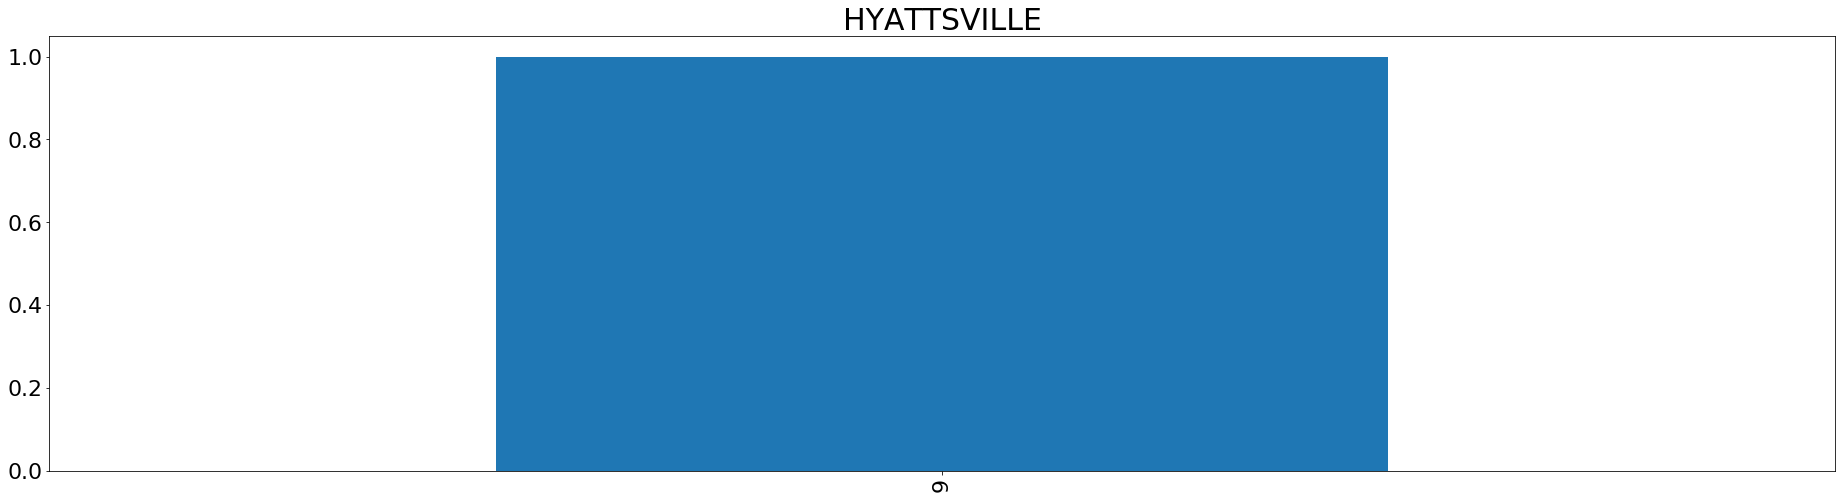

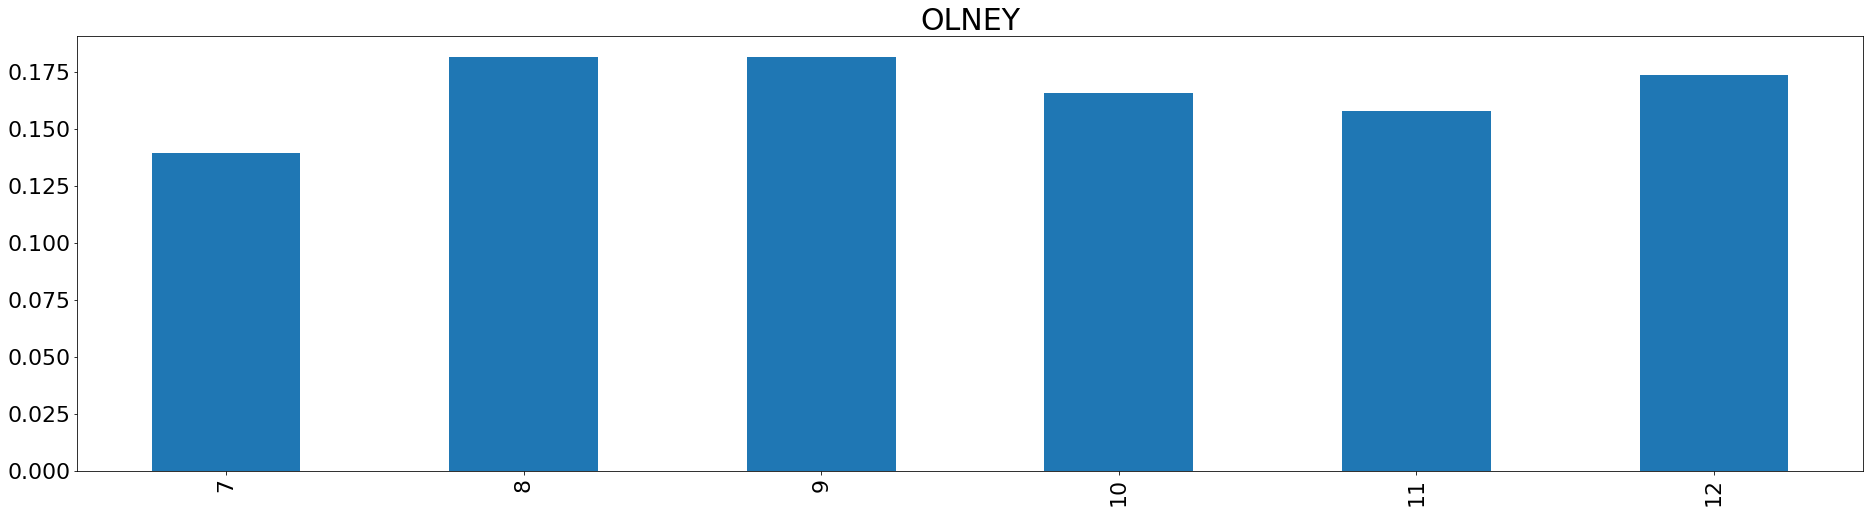

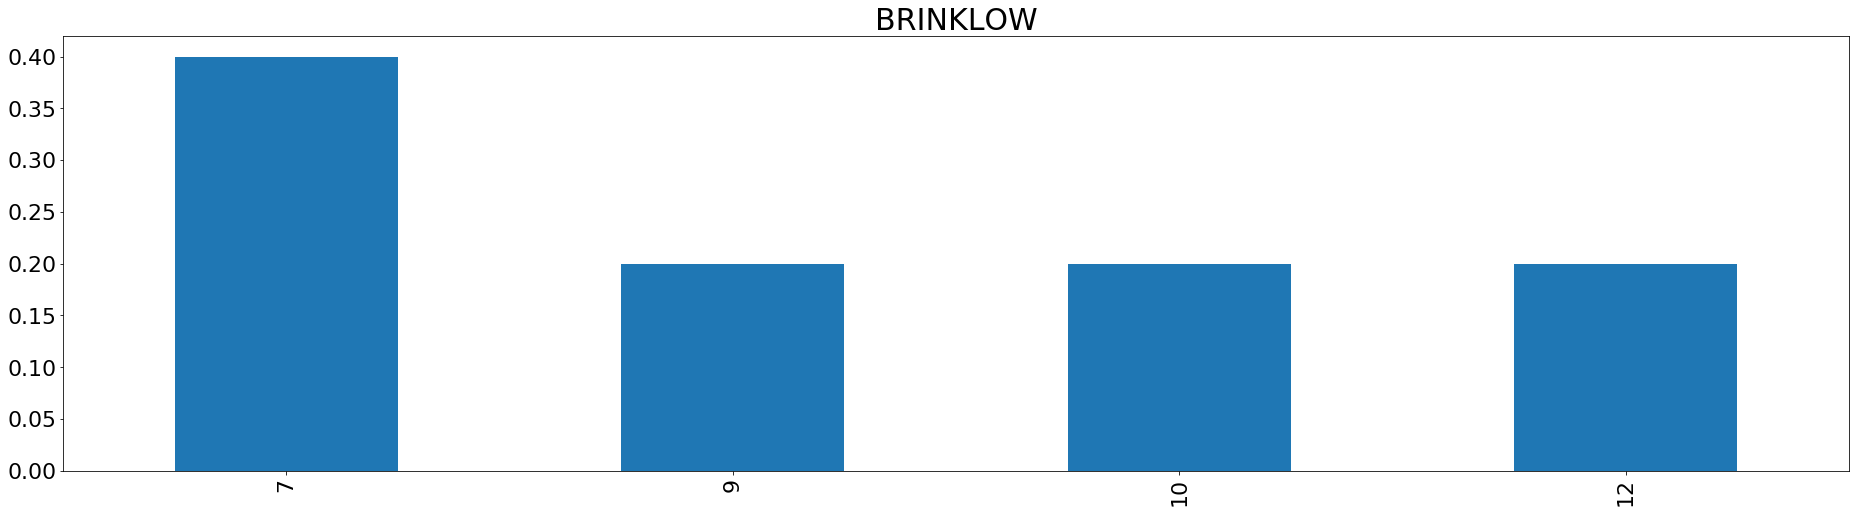

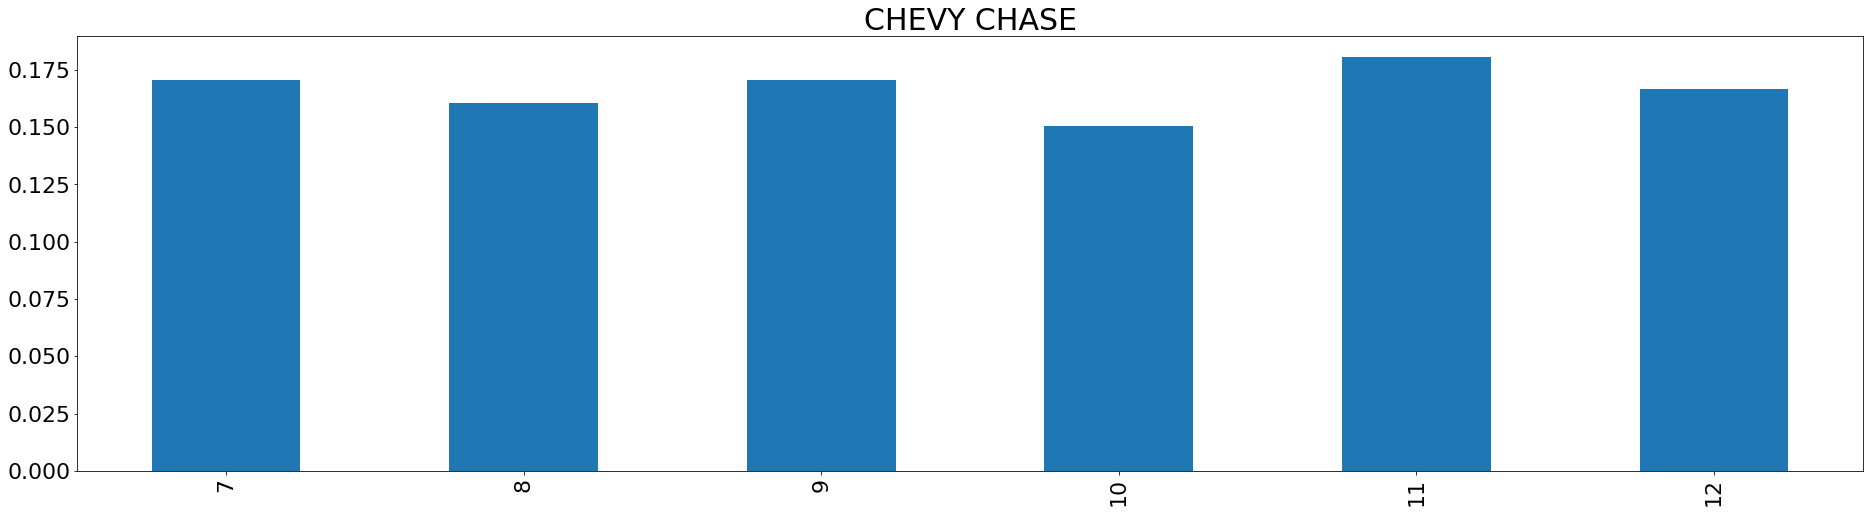

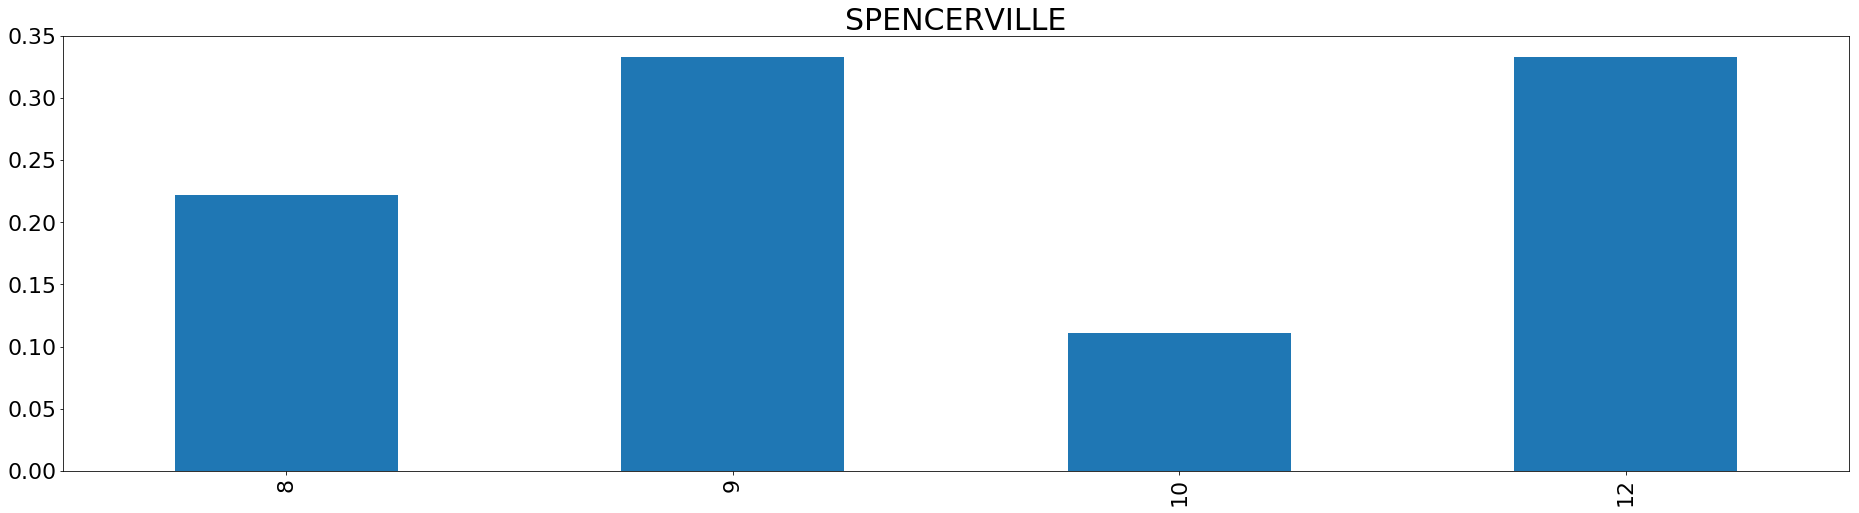

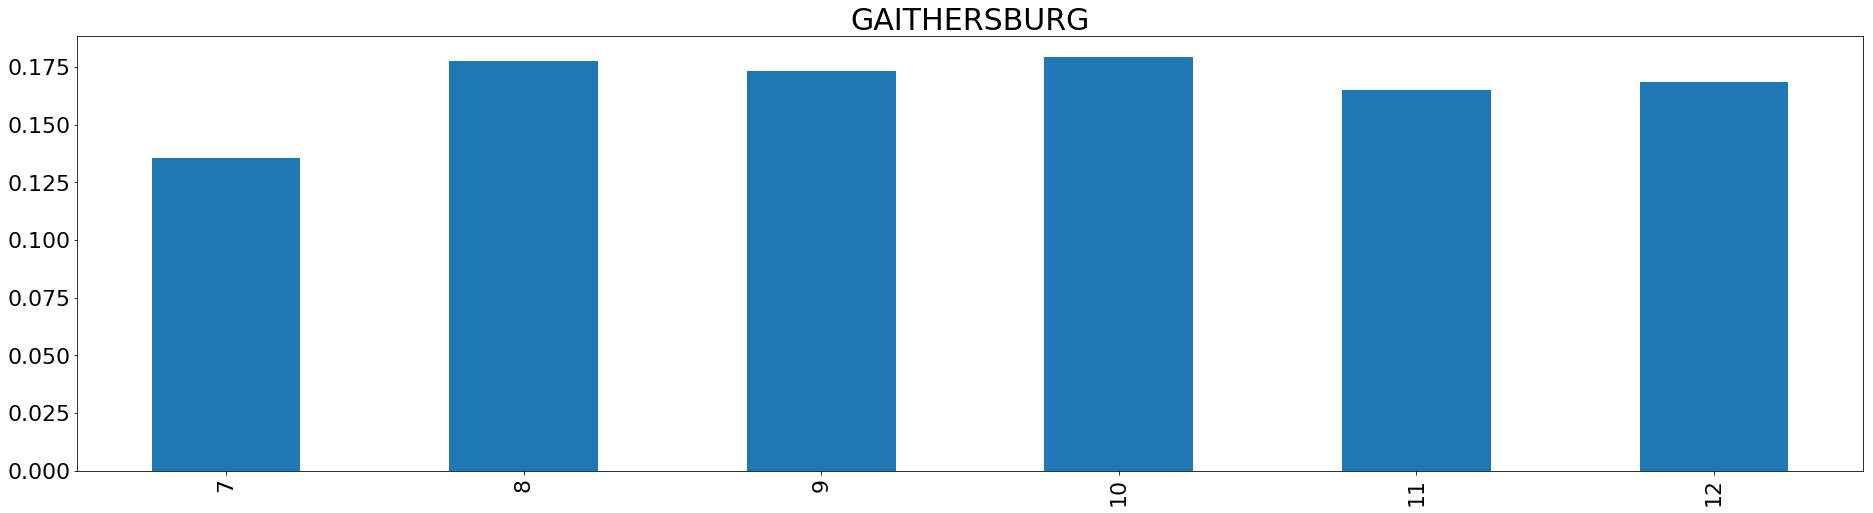

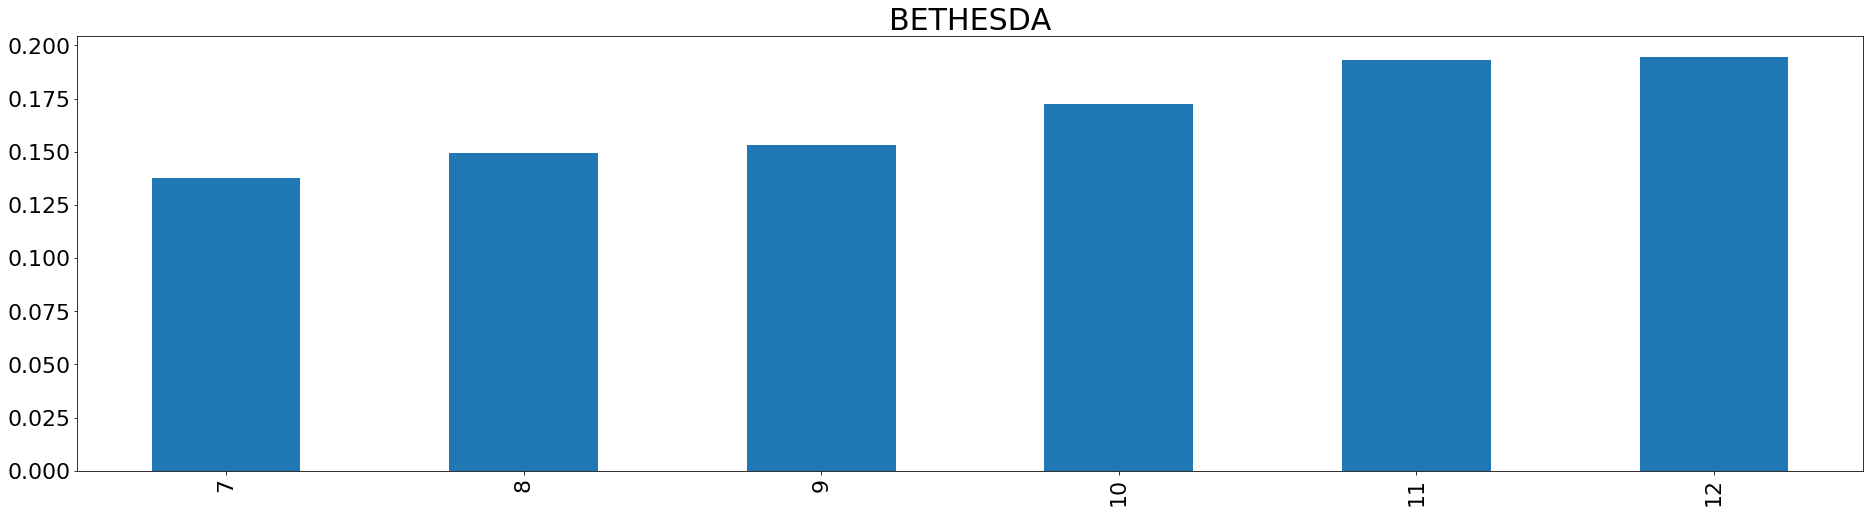

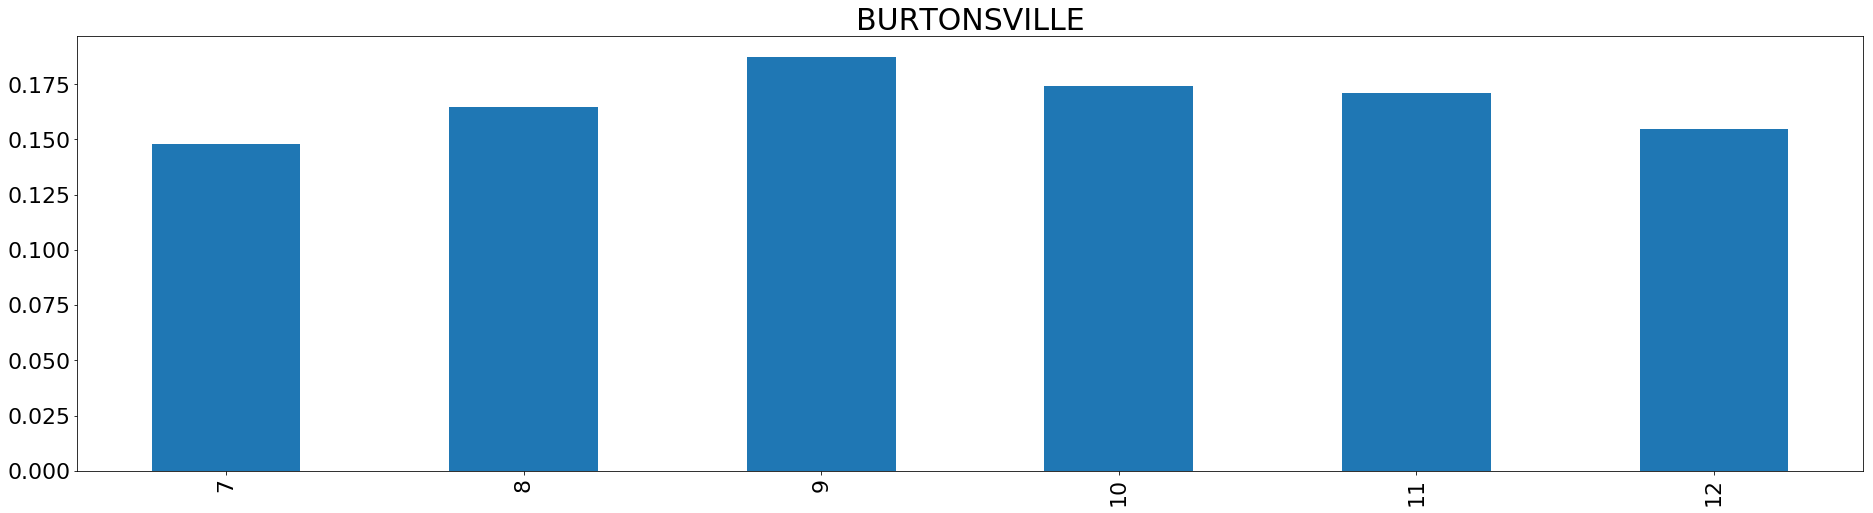

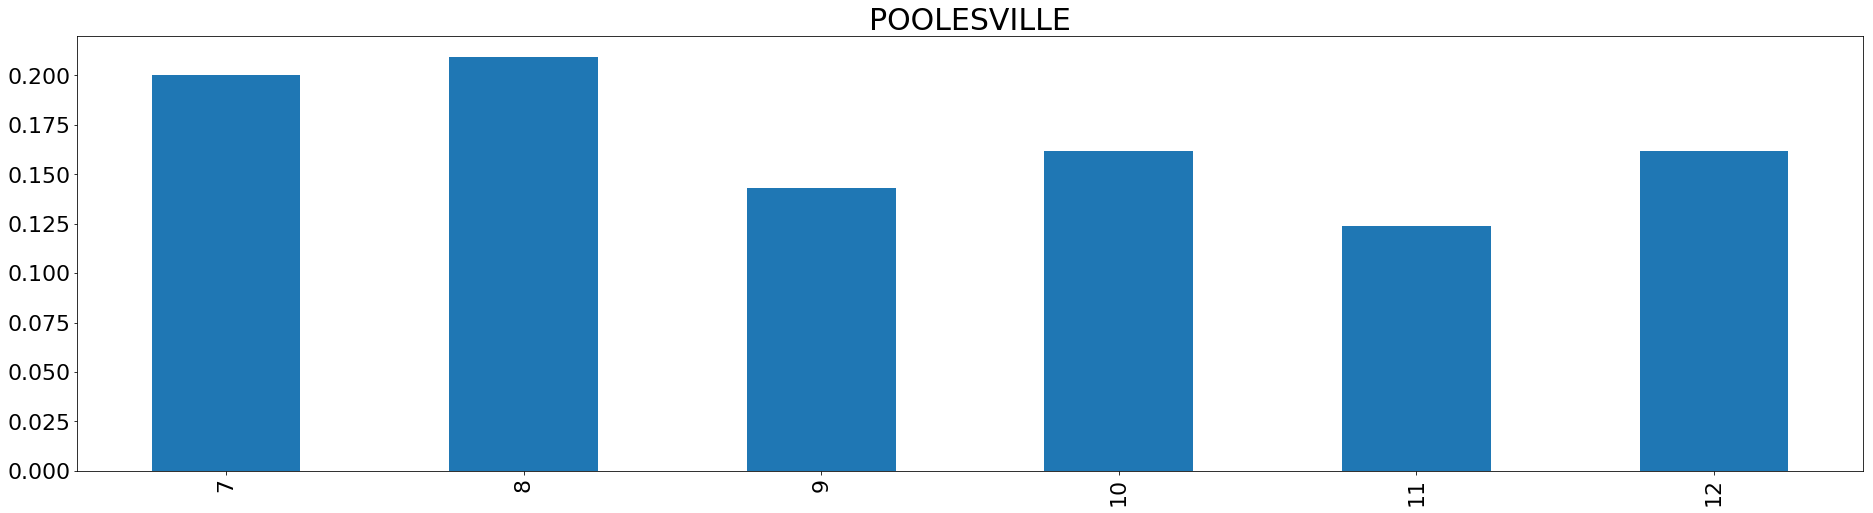

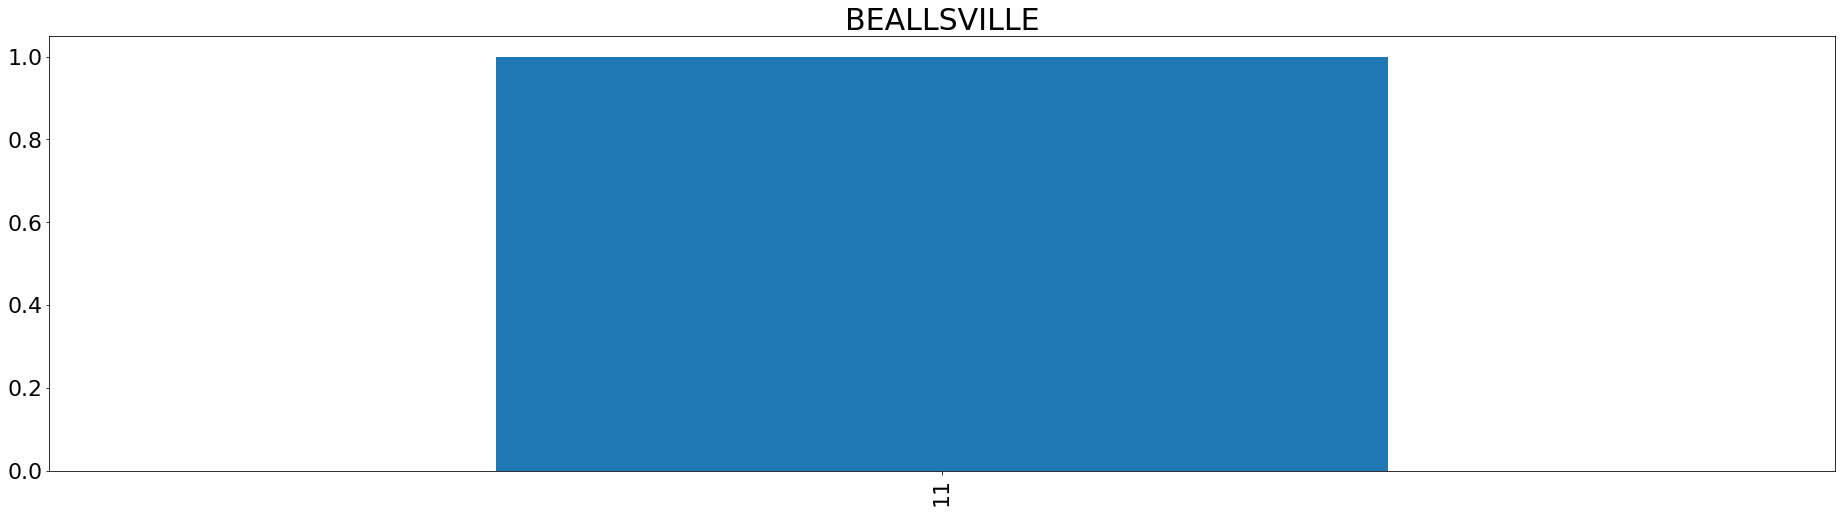

In [137]:
cities = set(crimes['City'])

for city in cities:
    pd.to_datetime(crimes[crimes['City'] == city].loc[:,"Dispatch Date / Time"]).dt.month.value_counts(normalize='True').sort_index().plot(kind='bar',
                                                                                    figsize = [32, 8],
                                                                                    fontsize=22)
    plt.title(city, fontsize=30)
    plt.show()

In [146]:

classDescriptionCol = crimes['Class'].astype(str)

def filtro_contem(coluna, regex):
  
    return coluna.str.contains(regex, case=False)

#domesticos
family = filtro_contem(classDescriptionCol,r'(?:\b201[1-6]).*')

#ofensas sexuais e estupro
sex_offense = filtro_contem(classDescriptionCol,r'(?:\b171[1-8])')
rape_crime = filtro_contem(classDescriptionCol,r'(?:\b21\d$)')

#lacerny
larceny = filtro_contem(classDescriptionCol,r'(?:\b6[1-3][1-9])')

#robbery
robbery = filtro_contem(classDescriptionCol, r"(\b3[1-4][1-8])")

auto_theft = filtro_contem(classDescriptionCol, r"(\b7[1-3])")

burg = filtro_contem(classDescriptionCol, r"\b5[1-3][1-9]")
#drogas/posse de drogas/
drug = filtro_contem(classDescriptionCol,r"(?:\b18[1-6][1-8]).*")

#ameaça de violencia
assault = filtro_contem(classDescriptionCol,r"(?:\b8[1-2][1-5])")

#AGGRAVATED ASSAULT
agg_assault = filtro_contem(classDescriptionCol, r"(?:\b4[1-4][1-5])")

#vandalismo ou dano objetos/propriedades/ incendio criminoso
vandalism= filtro_contem(classDescriptionCol,r"(?:\b14[1-2][1-7]|\b1431)")

#falsificacao cartao de credito/documentos/cheques etc 
forgery = filtro_contem(classDescriptionCol,r"(?:\b101[1-4])")

#fraude de checks
badcheck = filtro_contem(classDescriptionCol, r"(?:\b11[1-2][1-3])")

#miscleaneos não crimes (infracao, mau compartamento, delito, pessoa/veiculo suspeito)
#morte naturallost property|porperty
#perda de posse/abandono de propriedade/recuperaçao
#desaparecimento, incendio, vadiagem (menor de idade), trespassing, incidente doente mental

misc = filtro_contem(classDescriptionCol, r"(?:\b29\d\d)")

misc_trafic = filtro_contem(classDescriptionCol, r"(?:\b28\d\d)")
#stalking
#stalking = filtro_contem(classDescriptionCol, r".*(?:harassment|stalking).*")

#leis bebidas alcolicas
liquor = filtro_contem(classDescriptionCol, r"(?:\b221[1-7])")

#suicide
suicide = filtro_contem(classDescriptionCol, r"(?:\b261[1-6]|\b262[1-6])")

#disparo de arma de fogo
weapon_offense = filtro_contem(classDescriptionCol, r"(?:\b15[1-4][1-3])")

#outros crimes class 27xx
#violaccao ordem de restrição 
other_offenses = filtro_contem(classDescriptionCol, r"(?:\b27\d\d)")

#homicidios
homicide = filtro_contem(classDescriptionCol, r"(?:\b11[1-6]$)")

#desvio de verba
embezzle = filtro_contem(classDescriptionCol, r"(?:\b121[1-4]|\b122[1-4])")

#incidentes, acidentes animals
animal = filtro_contem(classDescriptionCol, r"(?:\b3[0-1]\d{2}).*")

#crimes por juvenis class 2313 e 2314
juvenile = filtro_contem(classDescriptionCol, r"(?:\b211[1-4])")

#conduta desordeira
disordely = filtro_contem(classDescriptionCol, r"(?:\b241[1-3])")

# roubo de propriedade
stolen_prop = filtro_contem(classDescriptionCol, r"(?:\b1311)")

arson = filtro_contem(classDescriptionCol, r"(?:\b9[1-3][1-3])")

vice = filtro_contem(classDescriptionCol, r'(?:\b161[3-4])')


crimes[
    ~family &
    ~sex_offense&
    ~rape_crime &
    ~larceny &
    ~robbery&
    ~badcheck&
    ~drug & 
    ~assault & 
    ~agg_assault&
    ~vandalism & 
    ~forgery &
    ~misc &
    ~liquor &
    ~suicide &
    ~weapon_offense &
    ~homicide &
    ~embezzle &
    ~animal &
    ~juvenile &
    ~disordely &
    ~stolen_prop &
    ~auto_theft&
    ~burg&
    ~misc_trafic&
    ~arson&
    ~vice&
    ~other_offenses]



/home/rute/anaconda3/envs/topicosF/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,Incident ID,CR Number,Dispatch Date / Time,Class,Class Description,Police District Name,Block Address,City,State,Zip Code,...,Sector,Beat,PRA,Start Date / Time,End Date / Time,Latitude,Longitude,Police District Number,Location,Address Number


In [147]:
categorias = [family,
              sex_offense,
              rape_crime,
              larceny,
              robbery,
              badcheck,
              drug,
              assault,
              agg_assault,
              vandalism, 
              forgery,
              misc,
              liquor,
              suicide,
              weapon_offense,
              homicide,
              embezzle,
              animal,
              juvenile,
              disordely,
              stolen_prop,
              auto_theft,
              burg,
              misc_trafic,
              arson,
              vice,
              other_offenses]

concat_category = crimes[sex_offense]
for cat in categorias:
       concat_category = pd.concat([concat_category,crimes[cat]])
        
print('ok')

ok


In [148]:
concat_category.shape

(23529, 22)

In [149]:
crimes.shape

(23369, 22)

In [145]:
set(concat_category[concat_category['Incident ID'].duplicated(keep=False)].sort_values('Incident ID')['Class'])

{1711, 1712, 1713, 1714, 1715, 1716, 1718}

In [107]:
? concat_category.duplicated